
## Clasificador IR
Predecir ASCI utilizando lo Espectros InfraRojos (IR) 
SVR - PLS coniteraciones en el random state

## Librerias

In [16]:
#librerias

#Tratamiento Datos
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import Normalizer # Normalizacion de datos


#Librerias Creacion de Modelos
from sklearn.model_selection import train_test_split #Partir datos de prueba y entrenamiento
from sklearn.preprocessing import StandardScaler    #Normalizar datos para manejar la misma escala
from sklearn.decomposition import PCA   #Algoritmo PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#Librerias Metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


#Graficas
import matplotlib.pyplot as plt

In [17]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiento Datos**


### Importar Datos IR

In [18]:
#En las columnas están las muestras (82) y sus espectros ir
Datos_IR = pd.read_excel("Data/ASCI_IR.xlsx") #import dtframe ,skipinitialspace=True, skiprows=1

print(Datos_IR.shape)#Ver tamaño dataset
Datos_IR.head() #print dt frame

(82, 7469)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,2,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,3,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,4,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145


In [19]:
Datos_IR=Datos_IR.drop(Datos_IR.columns[0], axis=1)
print(Datos_IR.shape)
Datos_IR.head()

(82, 7468)


,0,1,2,3,4,5,6,7,8,9,...,7458,7459,7460,7461,7462,7463,7464,7465,7466,7467
0,0.011097,0.011199,0.010985,0.010543,0.010022,0.009558,0.009238,0.009085,0.009071,0.009146,...,0.007546,0.007546,0.007545,0.007542,0.007537,0.007530,0.007522,0.007512,0.007503,0.007494
1,0.012468,0.012486,0.012449,0.012386,0.012352,0.012396,0.012543,0.012782,0.013081,0.013398,...,0.003964,0.003966,0.003967,0.003967,0.003967,0.003969,0.003970,0.003973,0.003975,0.003976
2,0.018689,0.018286,0.017887,0.017561,0.017360,0.017291,0.017324,0.017413,0.017528,0.017675,...,0.000043,0.000035,0.000026,0.000016,0.000008,0.000003,0.000000,0.000001,0.000006,0.000013
3,0.015869,0.015885,0.015737,0.015513,0.015276,0.015056,0.014842,0.014605,0.014319,0.013989,...,0.011477,0.011465,0.011455,0.011450,0.011447,0.011448,0.011453,0.011460,0.011469,0.011480
4,0.006940,0.006977,0.006766,0.006420,0.006081,0.005889,0.005934,0.006241,0.006779,0.007492,...,0.003165,0.003165,0.003163,0.003158,0.003152,0.003147,0.003144,0.003142,0.003143,0.003145


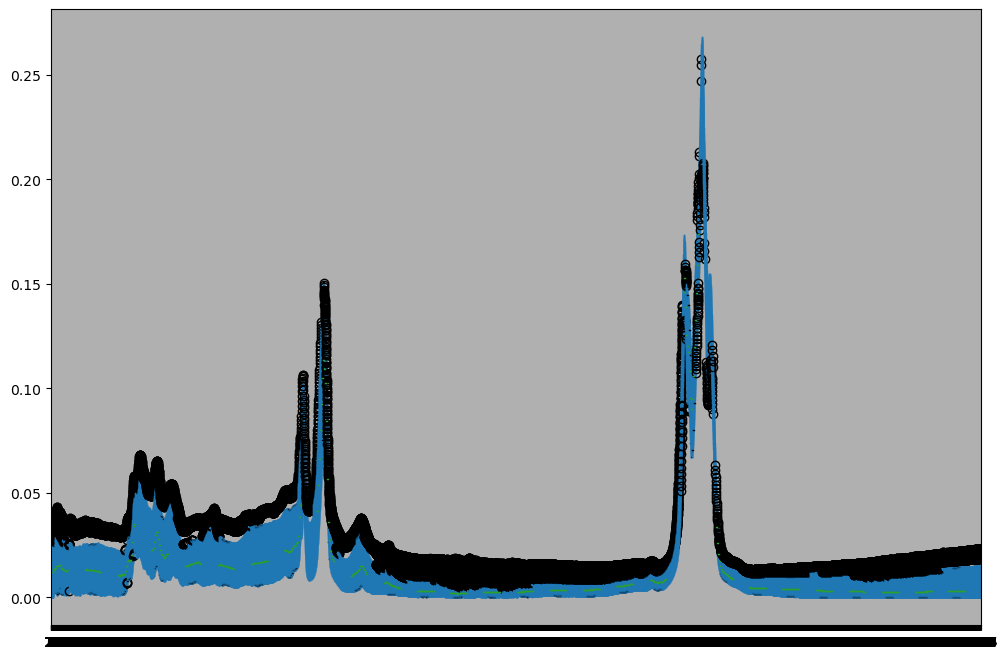

In [20]:
plt.figure(figsize=(12, 8))
Datos_IR.boxplot()
plt.savefig('Graficas/BoxplotASCI.png')
plt.show()

In [21]:
# IR transpose

Datos_IR = Datos_IR.transpose()
print(Datos_IR.shape)
Datos_IR.head()

(7468, 82)


,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.011097,0.012468,0.018689,0.015869,0.006940,0.006935,0.016425,0.025610,0.011233,0.015542,...,0.037838,0.025816,0.017109,0.014263,0.040873,0.012003,0.015255,0.014519,0.012098,0.036427
1,0.011199,0.012486,0.018286,0.015885,0.006977,0.007533,0.015106,0.025668,0.010532,0.015678,...,0.036763,0.026283,0.017330,0.014050,0.040392,0.012234,0.014849,0.015313,0.013569,0.036521
2,0.010985,0.012449,0.017887,0.015737,0.006766,0.008007,0.013928,0.025952,0.010026,0.015707,...,0.035667,0.026582,0.017588,0.013578,0.039723,0.012054,0.014527,0.016455,0.014856,0.036305
3,0.010543,0.012386,0.017561,0.015513,0.006420,0.008331,0.013067,0.026408,0.009778,0.015686,...,0.034714,0.026754,0.017884,0.012980,0.038974,0.011595,0.014288,0.017791,0.015892,0.035926
4,0.010022,0.012352,0.017360,0.015276,0.006081,0.008482,0.012639,0.026994,0.009770,0.015676,...,0.034033,0.026838,0.018222,0.012398,0.038242,0.011025,0.014117,0.019159,0.016641,0.035521


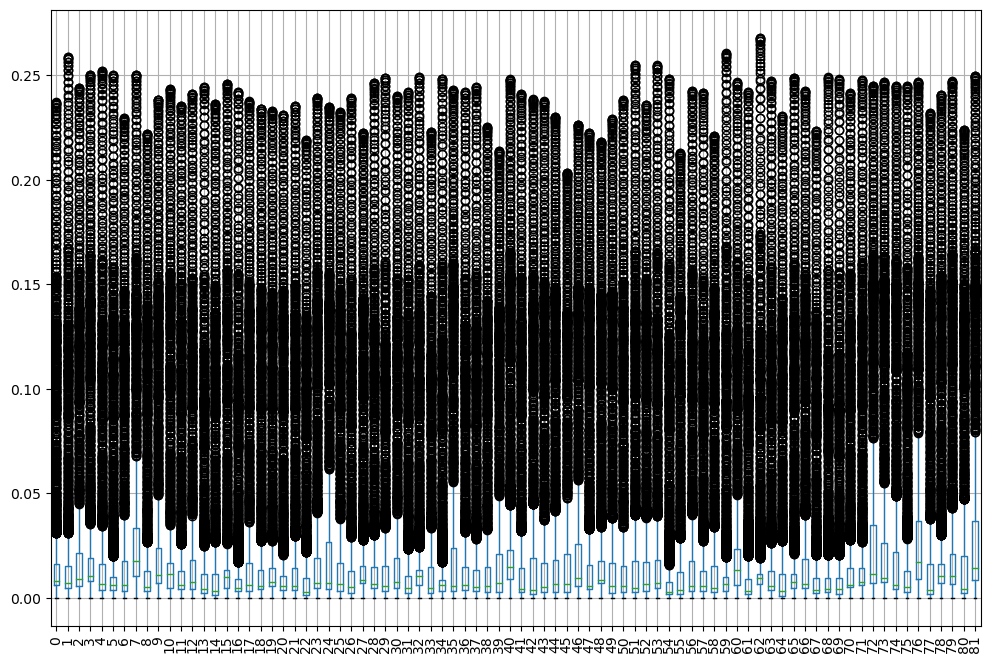

(7468, 82)


In [57]:
plt.figure(figsize=(12, 8))
Datos_IR.boxplot()
plt.xticks(rotation=90)

plt.savefig('Graficas/BoxplotASCI.png')

plt.show()
print(Datos_IR.shape)

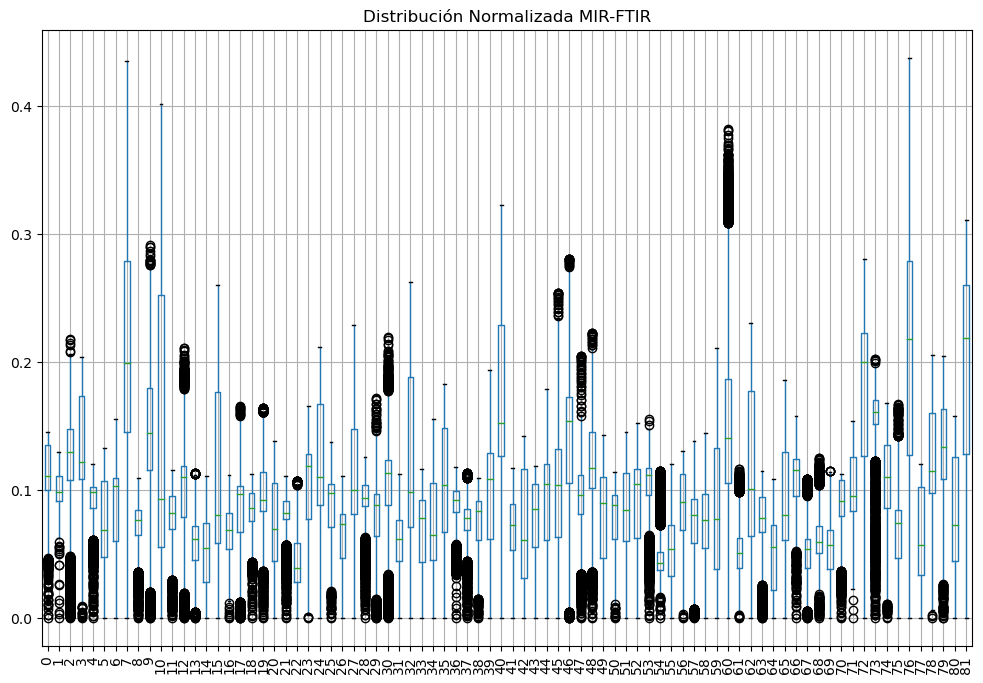

In [23]:
from sklearn.preprocessing import Normalizer

# Crear una instancia del normalizador
normalizer = Normalizer()

# Normalizar los datos
Datos_IR_normalized = normalizer.fit_transform(Datos_IR)

# Convertir de nuevo a DataFrame
Datos_IR_normalized = pd.DataFrame(Datos_IR_normalized, columns=Datos_IR.columns)

# Visualizar boxplots
plt.figure(figsize=(12, 8))
Datos_IR_normalized.boxplot()
plt.xticks(rotation=90)
plt.title('Distribución Normalizada MIR-FTIR')
plt.savefig('Graficas/BoxplotASCI_Normalized.png')
plt.show()

In [59]:
# Datos_IR=Datos_IR.drop(Datos_IR.columns[0], axis=1)
# Datos_IR.head 

In [60]:
Datos_IR_normalized_transpose=Datos_IR_normalized.transpose() 
print(Datos_IR_normalized_transpose)

        0         1         2         3         4         5         6     \
0   0.082180  0.083221  0.082089  0.079192  0.075435  0.071811  0.069103   
1   0.092336  0.092785  0.093031  0.093031  0.092966  0.093138  0.093826   
2   0.138412  0.135882  0.133668  0.131899  0.130660  0.129913  0.129590   
3   0.117522  0.118038  0.117604  0.116518  0.114977  0.113123  0.111025   
4   0.051398  0.051843  0.050562  0.048218  0.045766  0.044249  0.044389   
..       ...       ...       ...       ...       ...       ...       ...   
77  0.088891  0.090911  0.090079  0.087091  0.082983  0.078852  0.075512   
78  0.112976  0.110341  0.108558  0.107320  0.106254  0.105088  0.103663   
79  0.107525  0.113794  0.122963  0.133629  0.144201  0.153143  0.159375   
80  0.089598  0.100831  0.111016  0.119363  0.125247  0.128493  0.129512   
81  0.269778  0.271384  0.271305  0.269843  0.267353  0.264489  0.262050   

        7         8         9     ...      7458      7459      7460      7461  \
0   0.

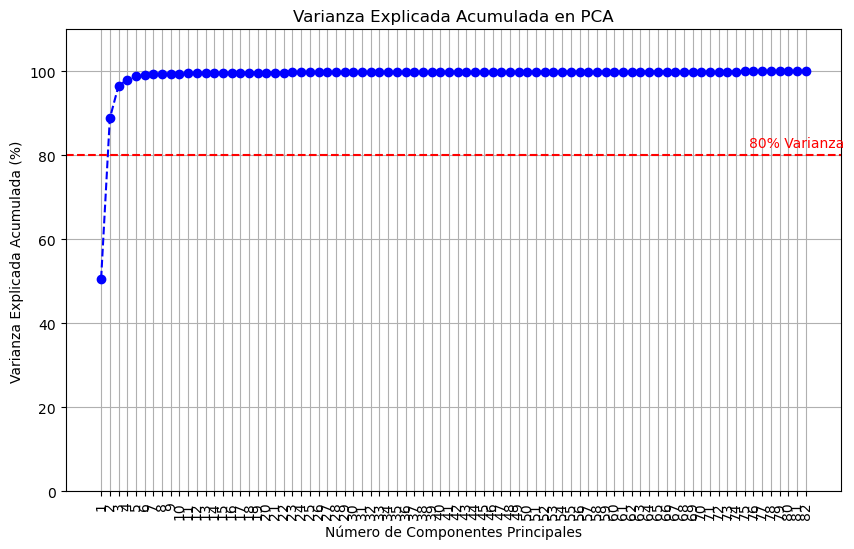

In [61]:
# Realizar PCA
pca = PCA()
pca.fit(Datos_IR_normalized_transpose)

# Calcular la varianza explicada acumulada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada) * 100  # Multiplicar por 100 para obtener porcentajes

# Graficar % de varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.title('Varianza Explicada Acumulada en PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada (%)')  # Cambiado a porcentaje
plt.xticks(range(1, len(varianza_acumulada) + 1),rotation=90)
plt.ylim(0, 110)  # Escala de 0 a 100%
plt.grid()

# Línea para el umbral del 95% (ajustar este valor si es necesario)
umbral_varianza = 80  # Cambia este valor si deseas otro umbral
plt.axhline(y=umbral_varianza, color='r', linestyle='--')  
plt.text(len(varianza_acumulada) - 1, umbral_varianza + 2, f'{umbral_varianza}% Varianza', color='red', ha='center')
plt.savefig('Graficas/%VarianzaExplicadaAcumuladaEspectroscopiaInfraRojos.png')
plt.show()

In [62]:
n_componentes = 2
pca = PCA(n_components=n_componentes)
valtn_transformado = pca.fit_transform(Datos_IR_normalized_transpose)

# Mostrar la varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100
print("Varianza explicada por cada uno de los 5 componentes:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"Componente {i}: {var:.2f}%")

# Guardar los datos transformados en un DataFrame
datos_pca = pd.DataFrame(data=valtn_transformado, columns=[f'Componente_{i}' for i in range(1, n_componentes + 1)])

# Mostrar las primeras filas del DataFrame transformado
print("\nPrimeras filas de los datos transformados:")
print(datos_pca.shape)
print(type(datos_pca))
print(datos_pca.head())

Varianza explicada por cada uno de los 5 componentes:
Componente 1: 50.71%
Componente 2: 38.13%

Primeras filas de los datos transformados:
(82, 2)
<class 'pandas.core.frame.DataFrame'>
   Componente_1  Componente_2
0      0.004080      2.538511
1      0.505680      0.350861
2      4.174171     -0.652743
3     -1.072595      4.897747
4      0.101955     -0.475238


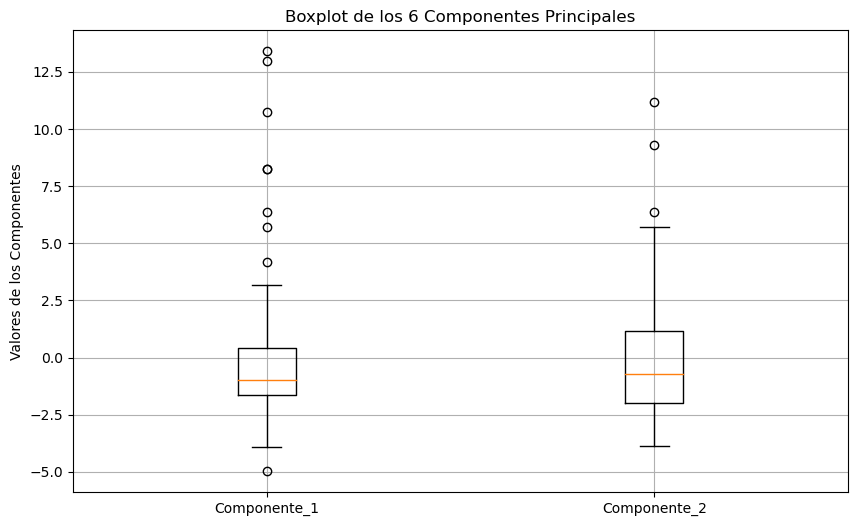

In [63]:
import matplotlib.pyplot as plt

# Crear un boxplot para los 5 componentes utilizando Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([datos_pca[f'Componente_{i}'] for i in range(1, 3)], labels=[f'Componente_{i}' for i in range(1, 3)])
plt.title('Boxplot de los 6 Componentes Principales')
plt.ylabel('Valores de los Componentes')
plt.grid()
plt.show()


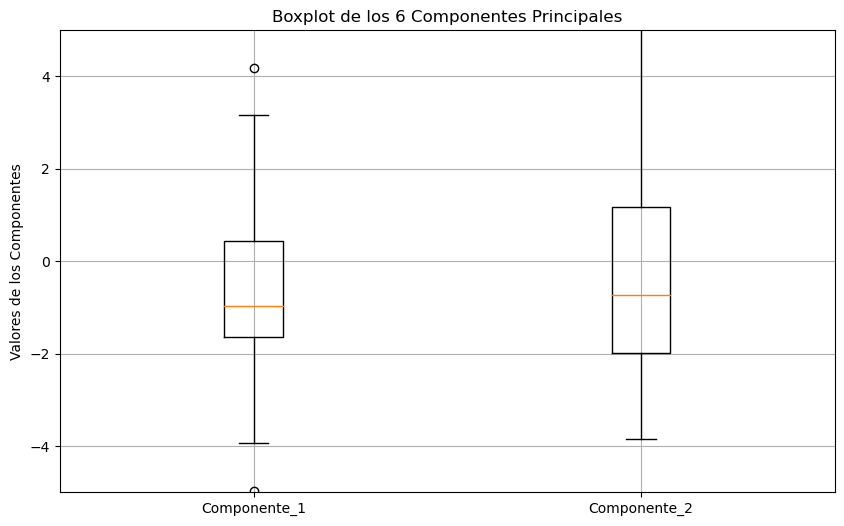

In [64]:
import matplotlib.pyplot as plt

# Crear un boxplot para los 5 componentes utilizando Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot([datos_pca[f'Componente_{i}'] for i in range(1, 3)], labels=[f'Componente_{i}' for i in range(1, 3)])
plt.title('Boxplot de los 6 Componentes Principales')
plt.ylabel('Valores de los Componentes')
plt.ylim(-5, 5)  # Establecer los límites del eje y entre -5 y 5
plt.savefig('Graficas/BoxplotPCAEspectroscopiaIR.png')
plt.grid()
plt.show()


In [65]:
# valSum=Datos_IR_normalized_transpose.sum(axis=1)
# valorSumados=valSum.values
# print(valorSumados)
# print(valorSumados.shape)

In [66]:
# suma=valorSumados.reshape(82,1) #Reshape
# Datos_IRMean=Datos_IR_normalized_transpose/suma 

# # #dt_List_Comp - Transpuestos/SumaColumnas
# print(Datos_IRMean.shape)
# Datos_IRMean.head()

In [67]:
# #Creacion Modelo PCA 2 componentes
# pca=PCA(n_components=2) 
# pca.fit(Datos_IR_normalized_transpose) # obtener los componentes principales
# datos_pca=pca.transform(Datos_IRMean) # convertimos nuestros datos con las nuevas dimensiones de PCA
# print(datos_pca.shape)
# print(type(datos_pca))
# print(datos_pca)

In [68]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Convertir datos_pca a un DataFrame
# datos_pca_df = pd.DataFrame(datos_pca, columns=['Componente 1', 'Componente 2', 'Componente 3'])

# # Crear el boxplot
# plt.figure(figsize=(12, 8))
# datos_pca_df.boxplot()
# plt.title('Boxplot de Componentes Principales')
# plt.savefig('Graficas/BoxplotPCAASCI.png')
# plt.show()

### Definir features y targets

In [69]:
#En las columnas están las muestras (82) y sus espectros ir
Datos_IR_Target = pd.read_excel("Data/ASCI_IR.xlsx", sheet_name='ASCI')#import dtframe ,skipinitialspace=True, skiprows=1

print(Datos_IR_Target.shape)#Ver tamaño dataset
Datos_IR_Target #print dt frame

(82, 1)


,label
0,10
1,10
2,13
3,11
4,11
...,...
77,8
78,10
79,9
80,11


In [70]:
dt_features= Datos_IR.values[:,:] 
dt_features



array([[1.10966015e-02, 1.24679071e-02, 1.86894114e-02, ...,
        1.45187850e-02, 1.20981036e-02, 3.64273530e-02],
       [1.11991453e-02, 1.24862852e-02, 1.82859382e-02, ...,
        1.53134737e-02, 1.35690496e-02, 3.65206370e-02],
       [1.09848555e-02, 1.24491321e-02, 1.78871333e-02, ...,
        1.64545678e-02, 1.48558137e-02, 3.63052743e-02],
       ...,
       [7.51200917e-03, 3.97298076e-03, 1.27441867e-06, ...,
        1.18493698e-02, 4.20803575e-03, 9.59961893e-06],
       [7.50250605e-03, 3.97471363e-03, 5.94731911e-06, ...,
        1.18557313e-02, 4.20305128e-03, 5.00847036e-06],
       [7.49422931e-03, 3.97558006e-03, 1.27443550e-05, ...,
        1.18633563e-02, 4.19621426e-03, 0.00000000e+00]])

In [71]:
dt_target= Datos_IR_Target.values[:,0] 
dt_target

array([10, 10, 13, 11, 11, 14, 10, 14, 16, 18, 16, 12, 15, 17, 10, 12, 12,
       12, 15, 19, 15, 11, 12, 17, 11, 11, 16, 19, 20, 16, 13, 15, 13, 14,
       13,  5, 11, 12, 18, 15, 17, 16, 17, 12, 17,  8, 17, 17, 17, 17,  6,
       17, 12, 15, 14, 20, 20, 11, 16, 17, 17, 13, 15, 16, 15, 14, 15, 10,
       20, 14, 20, 10,  9, 13, 11, 12, 13,  8, 10,  9, 11, 12],
      dtype=int64)

In [72]:
#dt_features= vals_Feature[:,1:] 
# dt_target = vals[:,0] 

In [73]:
#dt_features

In [74]:
# Ya se normalizaron arriba
# dt_features = Normalizer().fit_transform(dt_features) #Normalizar datos
# print(dt_features)

In [75]:
# print(dt_features)

In [76]:
print(dt_features.shape)
dt_features=dt_features.transpose()
print(dt_features.shape)
print(dt_target.shape)

(7468, 82)
(82, 7468)
(82,)


# **Aplicacion Modelos ML**


In [77]:
#Reparticion de datos con los datos feature/target como vienen en el excel,se aplanó con un normalizer
X_tr1, X_te1, y_tr1, y_te1= train_test_split(dt_features, dt_target, train_size= 0.8,random_state = 1234 ,shuffle = True) #Split Valores No transformados

#Probar los datos despues de usar el algoritmo PCA 2 componentes
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(datos_pca, dt_target, train_size= 0.8, random_state = 1234,shuffle = True) #Split valores PCA transformados


In [78]:
SVC1 = SVC(C = 60, kernel = 'linear', random_state=123)
LDA = LinearDiscriminantAnalysis()

SVC1.fit(X_tr1, y_tr1)
LDA.fit(X_tr1, y_tr1)

#print(X_tr1.shape)
#print(y_tr1.shape)

LinearDiscriminantAnalysis()

In [79]:
## Con los Datos PCA
SVC2 = SVC(C = 60, kernel = 'linear', random_state=123)
LDA2 = LinearDiscriminantAnalysis()

SVC2.fit(X_tr2, y_tr2)
LDA2.fit(X_tr2, y_tr2)

#print(X_tr1.shape)
#print(y_tr1.shape)

LinearDiscriminantAnalysis()

In [80]:
# Predicciones test
# ==============================================================================
predicciones1 = SVC1.predict(X_te1)
#predicciones2 = modelo1.predict(X_te1)
prediccionesLDA = LDA.predict(X_te1)


print(predicciones1)
#print(predicciones2)
print(prediccionesLDA)

[12 13 10 14 12 10 17 12 12 12 10 13 17 12 12 12 11]
[10 11 13 14 13 10 17 20 10 15 10 15 17 16 12 12 11]


In [81]:
# Predicciones test Con los datos PCA
# ==============================================================================
predicciones2 = SVC2.predict(X_te2)
#predicciones2 = modelo1.predict(X_te1)
prediccionesLDA2 = LDA2.predict(X_te2)


print(predicciones2)
#print(predicciones2)
print(prediccionesLDA2)

[17 13 13 13 17 17 17 17 17 17 12 17 17 12 12 17 13]
[17 19 19 13 17 17 17 17 17 17 12 17 17 17 17 17 13]


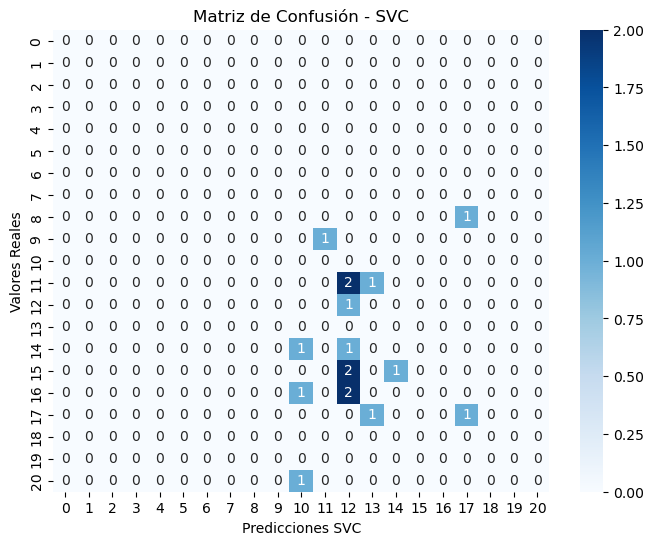

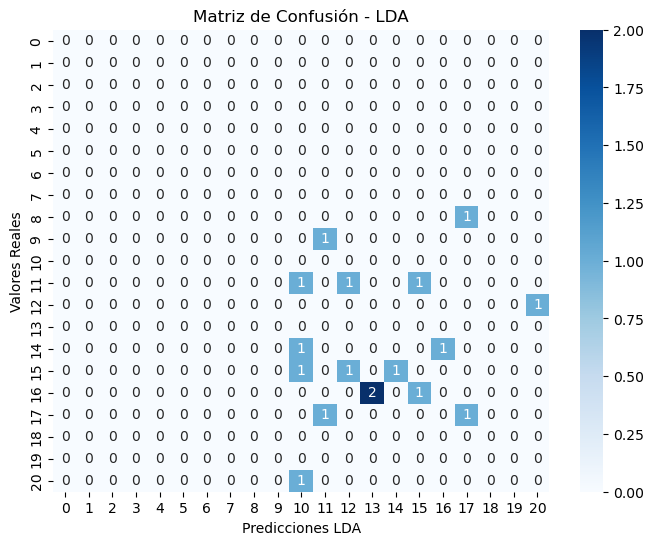

In [82]:

from sklearn.metrics import confusion_matrix
import seaborn as sns


# Crear la matriz de confusión para SVC con tamaño fijo de 21x21
cm_svc = confusion_matrix(y_te1, predicciones1, labels=np.arange(21))

# Crear la matriz de confusión para LDA con tamaño fijo de 21x21
cm_lda = confusion_matrix(y_te1, prediccionesLDA, labels=np.arange(21))

# Rango de etiquetas de los ejes
labels = np.arange(0,21)

# Visualizar la matriz de confusión usando seaborn para SVC
plt.figure(figsize=(8,6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones SVC')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - SVC')
plt.savefig("Graficas/MatrizConf_ASCI_SVC.png")

plt.show()

# Visualizar la matriz de confusión usando seaborn para LDA
plt.figure(figsize=(8,6))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones LDA')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - LDA')
plt.savefig("Graficas/MatrizConf_ASCI_LDA.png")
plt.show()



## **Metricas**

In [83]:
#Error medio absoluto
RMAE_SVC = np.sqrt(mean_absolute_error(predicciones1, y_te1))
RMAE_LDA = np.sqrt(mean_absolute_error(prediccionesLDA, y_te1))


print(RMAE_SVC)
print(RMAE_LDA)

# Accuracy de test del modelo 
# ==============================================================================
accuracySVC = accuracy_score(y_te1,predicciones1,normalize = True)
accuracyLDA = accuracy_score(y_te1,prediccionesLDA,normalize = True)

print("")
print(f"El accuracy del test SVC es: {100*accuracySVC}%")
print(f"El accuracy del test LDA es: {100*accuracyLDA}%")

1.8149704259460602
1.9250668437592438

El accuracy del test SVC es: 11.76470588235294%
El accuracy del test LDA es: 5.88235294117647%


In [84]:
#Error medio absoluto con PCA
RMAE_SVC2 = np.sqrt(mean_absolute_error(predicciones2, y_te2))
RMAE_LDA2 = np.sqrt(mean_absolute_error(prediccionesLDA2, y_te2))


print(RMAE_SVC2)
print(RMAE_LDA2)

# Accuracy de test del modelo 
# ==============================================================================
accuracySVC2 = accuracy_score(y_te2,predicciones2,normalize = True)
accuracyLDA2 = accuracy_score(y_te2,prediccionesLDA2,normalize = True)

print("")
print(f"El accuracy del test SVC es: {100*accuracySVC2}%")
print(f"El accuracy del test LDA es: {100*accuracyLDA2}%")

1.8629514849544841
1.8311038136792213

El accuracy del test SVC es: 5.88235294117647%
El accuracy del test LDA es: 5.88235294117647%


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
import numpy as np

# Inicialización del modelo Random Forest
RF_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123)

# Entrenamiento del modelo con los datos de entrenamiento
RF_model.fit(X_tr1, y_tr1)

# Predicciones con los datos de prueba
prediccionesRF = RF_model.predict(X_te1)

# Cálculo del Error Medio Absoluto (RMAE)
RMAE_RF = np.sqrt(mean_absolute_error(prediccionesRF, y_te1))
print(f"RMAE para Random Forest: {RMAE_RF}")

# Cálculo del Accuracy del modelo
accuracyRF = accuracy_score(y_te1, prediccionesRF)
print(f"El accuracy del test Random Forest es: {100*accuracyRF}%")


RMAE para Random Forest: 1.8786728732554485
El accuracy del test Random Forest es: 5.88235294117647%


In [86]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

#Modelos
SVC1 = SVC(C = 60, kernel = 'linear', random_state=123)
LDA = LinearDiscriminantAnalysis()
RF_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=123)
GB_model = GradientBoostingClassifier(n_estimators=100, random_state=123)

#fit
SVC1.fit(X_tr1, y_tr1)
LDA.fit(X_tr1, y_tr1)
RF_model.fit(X_tr1, y_tr1)
GB_model.fit(X_tr1, y_tr1)

#Predict
predicciones1 = SVC1.predict(X_te1)
prediccionesLDA = LDA.predict(X_te1)
prediccionesRF = RF_model.predict(X_te1)
prediccionesGB = GB_model.predict(X_te1)

print(f"Predicciones SVC: {predicciones1}")  # predicciones SVC
print(f"Predicciones LDA: {prediccionesLDA}")  # predicciones LDA
print(f"Predicciones Random Forest: {prediccionesRF}")  # Predicciones Random Forest
print(f"Predicciones Gradient Boosting: {prediccionesGB}")  # predicciones Gradient Boosting

# Metricas

#Error medio absoluto
RMAE_SVC = np.sqrt(mean_absolute_error(predicciones1, y_te1))
RMAE_LDA = np.sqrt(mean_absolute_error(prediccionesLDA, y_te1))
RMAE_RF = np.sqrt(mean_absolute_error(prediccionesRF, y_te1))
RMAE_GB = np.sqrt(mean_absolute_error(prediccionesGB, y_te1))

print(f"RMAE para SVC: {RMAE_SVC}")
print(f"RMAE para LDA: {RMAE_LDA}")
print(f"RMAE para Random Forest: {RMAE_RF}")
print(f"RMAE para Gradient Boosting: {RMAE_GB}")

# Accuracy de test del modelo 
# ==============================================================================
accuracySVC = accuracy_score(y_te1,predicciones1,normalize = True)
accuracyLDA = accuracy_score(y_te1,prediccionesLDA,normalize = True)
accuracyRF = accuracy_score(y_te1, prediccionesRF)
accuracyGB = accuracy_score(y_te1, prediccionesGB)

print("")
print(f"El accuracy del test SVC es: {100*accuracySVC}%")
print(f"El accuracy del test LDA es: {100*accuracyLDA}%")
print(f"El accuracy del test Random Forest es: {100*accuracyRF}%")
print(f"El accuracy del test Gradient Boosting es: {100*accuracyGB}%")




Predicciones SVC: [12 13 10 14 12 10 17 12 12 12 10 13 17 12 12 12 11]
Predicciones LDA: [10 11 13 14 13 10 17 20 10 15 10 15 17 16 12 12 11]
Predicciones Random Forest: [10 11 13 13 10 12 17 10 12 10 13 10 17 10 12 10 11]
Predicciones Gradient Boosting: [10 11 16 17 16 16 17 11 12 11 14 15 17 10 17 10 11]
RMAE para SVC: 1.8149704259460602
RMAE para LDA: 1.9250668437592438
RMAE para Random Forest: 1.8786728732554485
RMAE para Gradient Boosting: 1.6449566416599486

El accuracy del test SVC es: 11.76470588235294%
El accuracy del test LDA es: 5.88235294117647%
El accuracy del test Random Forest es: 5.88235294117647%
El accuracy del test Gradient Boosting es: 23.52941176470588%


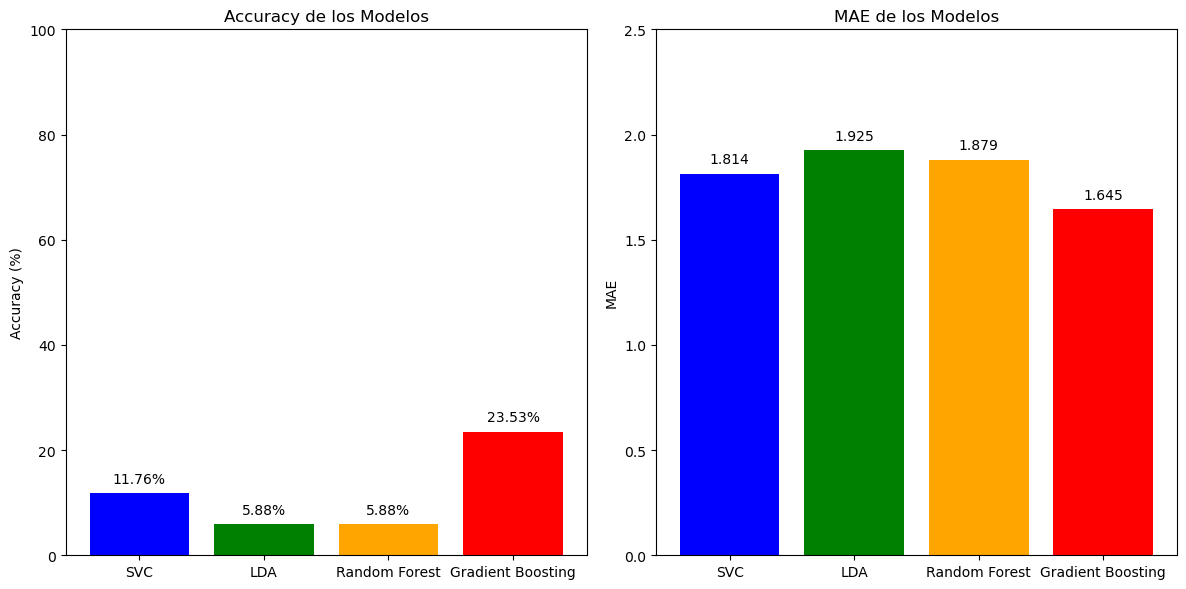

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Datos proporcionados
modelos = ['SVC', 'LDA', 'Random Forest', 'Gradient Boosting']
accuracy = [11.76, 5.88, 5.88, 23.53]  # Accuracy en %
rmae = [1.814, 1.925, 1.879, 1.645]   # RMAE

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras comparativo para accuracy
plt.subplot(1, 2, 1)
plt.bar(modelos, accuracy, color=['blue', 'green', 'orange', 'red'])
plt.title('Accuracy de los Modelos')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)  # Limitar de 0 a 100%
for i, v in enumerate(accuracy):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center')

# Gráfico de barras comparativo para RMAE
plt.subplot(1, 2, 2)
plt.bar(modelos, rmae, color=['blue', 'green', 'orange', 'red'])
plt.title('MAE de los Modelos')
plt.ylabel('MAE')
plt.ylim(0, 2.5)  # Limitar de 0 a 2.5
for i, v in enumerate(rmae):
    plt.text(i, v + 0.05, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()


## Graficas

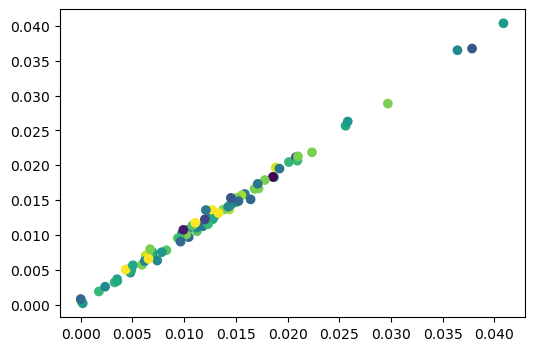

In [88]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(dt_features[:, 0], dt_features[:, 1], c=dt_target);

In [89]:
print(type(datos_pca))


<class 'pandas.core.frame.DataFrame'>


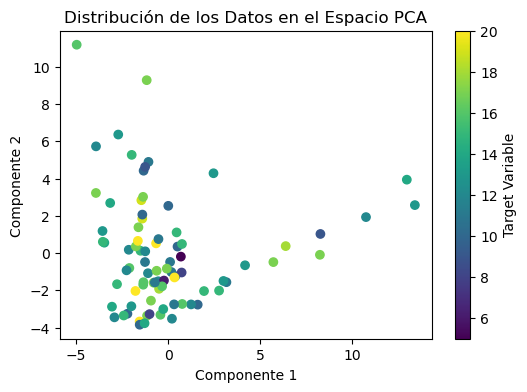

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Convertir el DataFrame a un array de NumPy (opcional)
datos_pca_array = datos_pca.to_numpy()

# Asegúrate de que dt_target sea un array de NumPy
dt_target_array = dt_target.to_numpy() if isinstance(dt_target, pd.Series) else dt_target

# Crear el scatter plot
fig, ax = plt.subplots(figsize=(6, 4))
scatter = ax.scatter(datos_pca_array[:, 0], datos_pca_array[:, 1], c=dt_target_array, cmap='viridis')

# Añadir la barra de color
plt.colorbar(scatter, label='Target Variable')  # Cambia el texto según lo que represente dt_target

# Etiquetas y título
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Distribución de los Datos en el Espacio PCA')

# Mostrar el gráfico
plt.show()


In [56]:
print(datos_pca_array)

[[ 4.07952022e-03  2.53851058e+00]
 [ 5.05680250e-01  3.50860990e-01]
 [ 4.17417117e+00 -6.52743231e-01]
 [-1.07259524e+00  4.89774715e+00]
 [ 1.01955406e-01 -4.75237560e-01]
 [-3.46978809e+00  5.59197425e-01]
 [ 1.60215144e+00 -2.76707939e+00]
 [ 1.29623410e+01  3.94321927e+00]
 [-2.11206405e+00 -8.00291742e-01]
 [ 6.38238916e+00  3.76477383e-01]
 [-4.97261595e+00  1.11887163e+01]
 [-2.14373522e+00  1.79149067e-01]
 [ 2.76257009e+00 -2.01332756e+00]
 [-1.15003585e+00 -3.36342546e+00]
 [-2.21617960e+00 -3.25568037e+00]
 [-3.92252111e+00  5.73202841e+00]
 [-2.26412633e+00 -9.24935932e-01]
 [ 1.24247902e+00 -2.75465313e+00]
 [-1.50496438e+00  1.25355282e-01]
 [-1.40975817e+00  1.85195576e+00]
 [-3.55254903e+00  6.07922649e-01]
 [-1.26072657e+00 -4.78939514e-01]
 [-2.92197837e+00 -3.44937388e+00]
 [-1.61717371e+00  1.38699376e+00]
 [ 3.16200805e+00 -1.56044901e+00]
 [ 1.72353700e-01 -1.01705409e+00]
 [-4.23223364e-01 -3.31130011e+00]
 [-1.46011595e+00  2.83989086e+00]
 [-6.58126275e-01  5

In [42]:
from joblib import dump
dump(SVC1, './modelosPKL/Classifier_ASCI_SVR.pkl')

['./modelosPKL/Classifier_ASCI_SVR.pkl']